# This notebook is dedicated to creating a repeating Givens gate used in the initialisation of the circuit.

In [1]:
import numpy as np
from qiskit import IBMQ, assemble
from qiskit.quantum_info.operators import Operator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.jobstatus import JobStatus

#provider = IBMQ.load_account()
#backend = provider.backend.ibmq_qasm_simulator

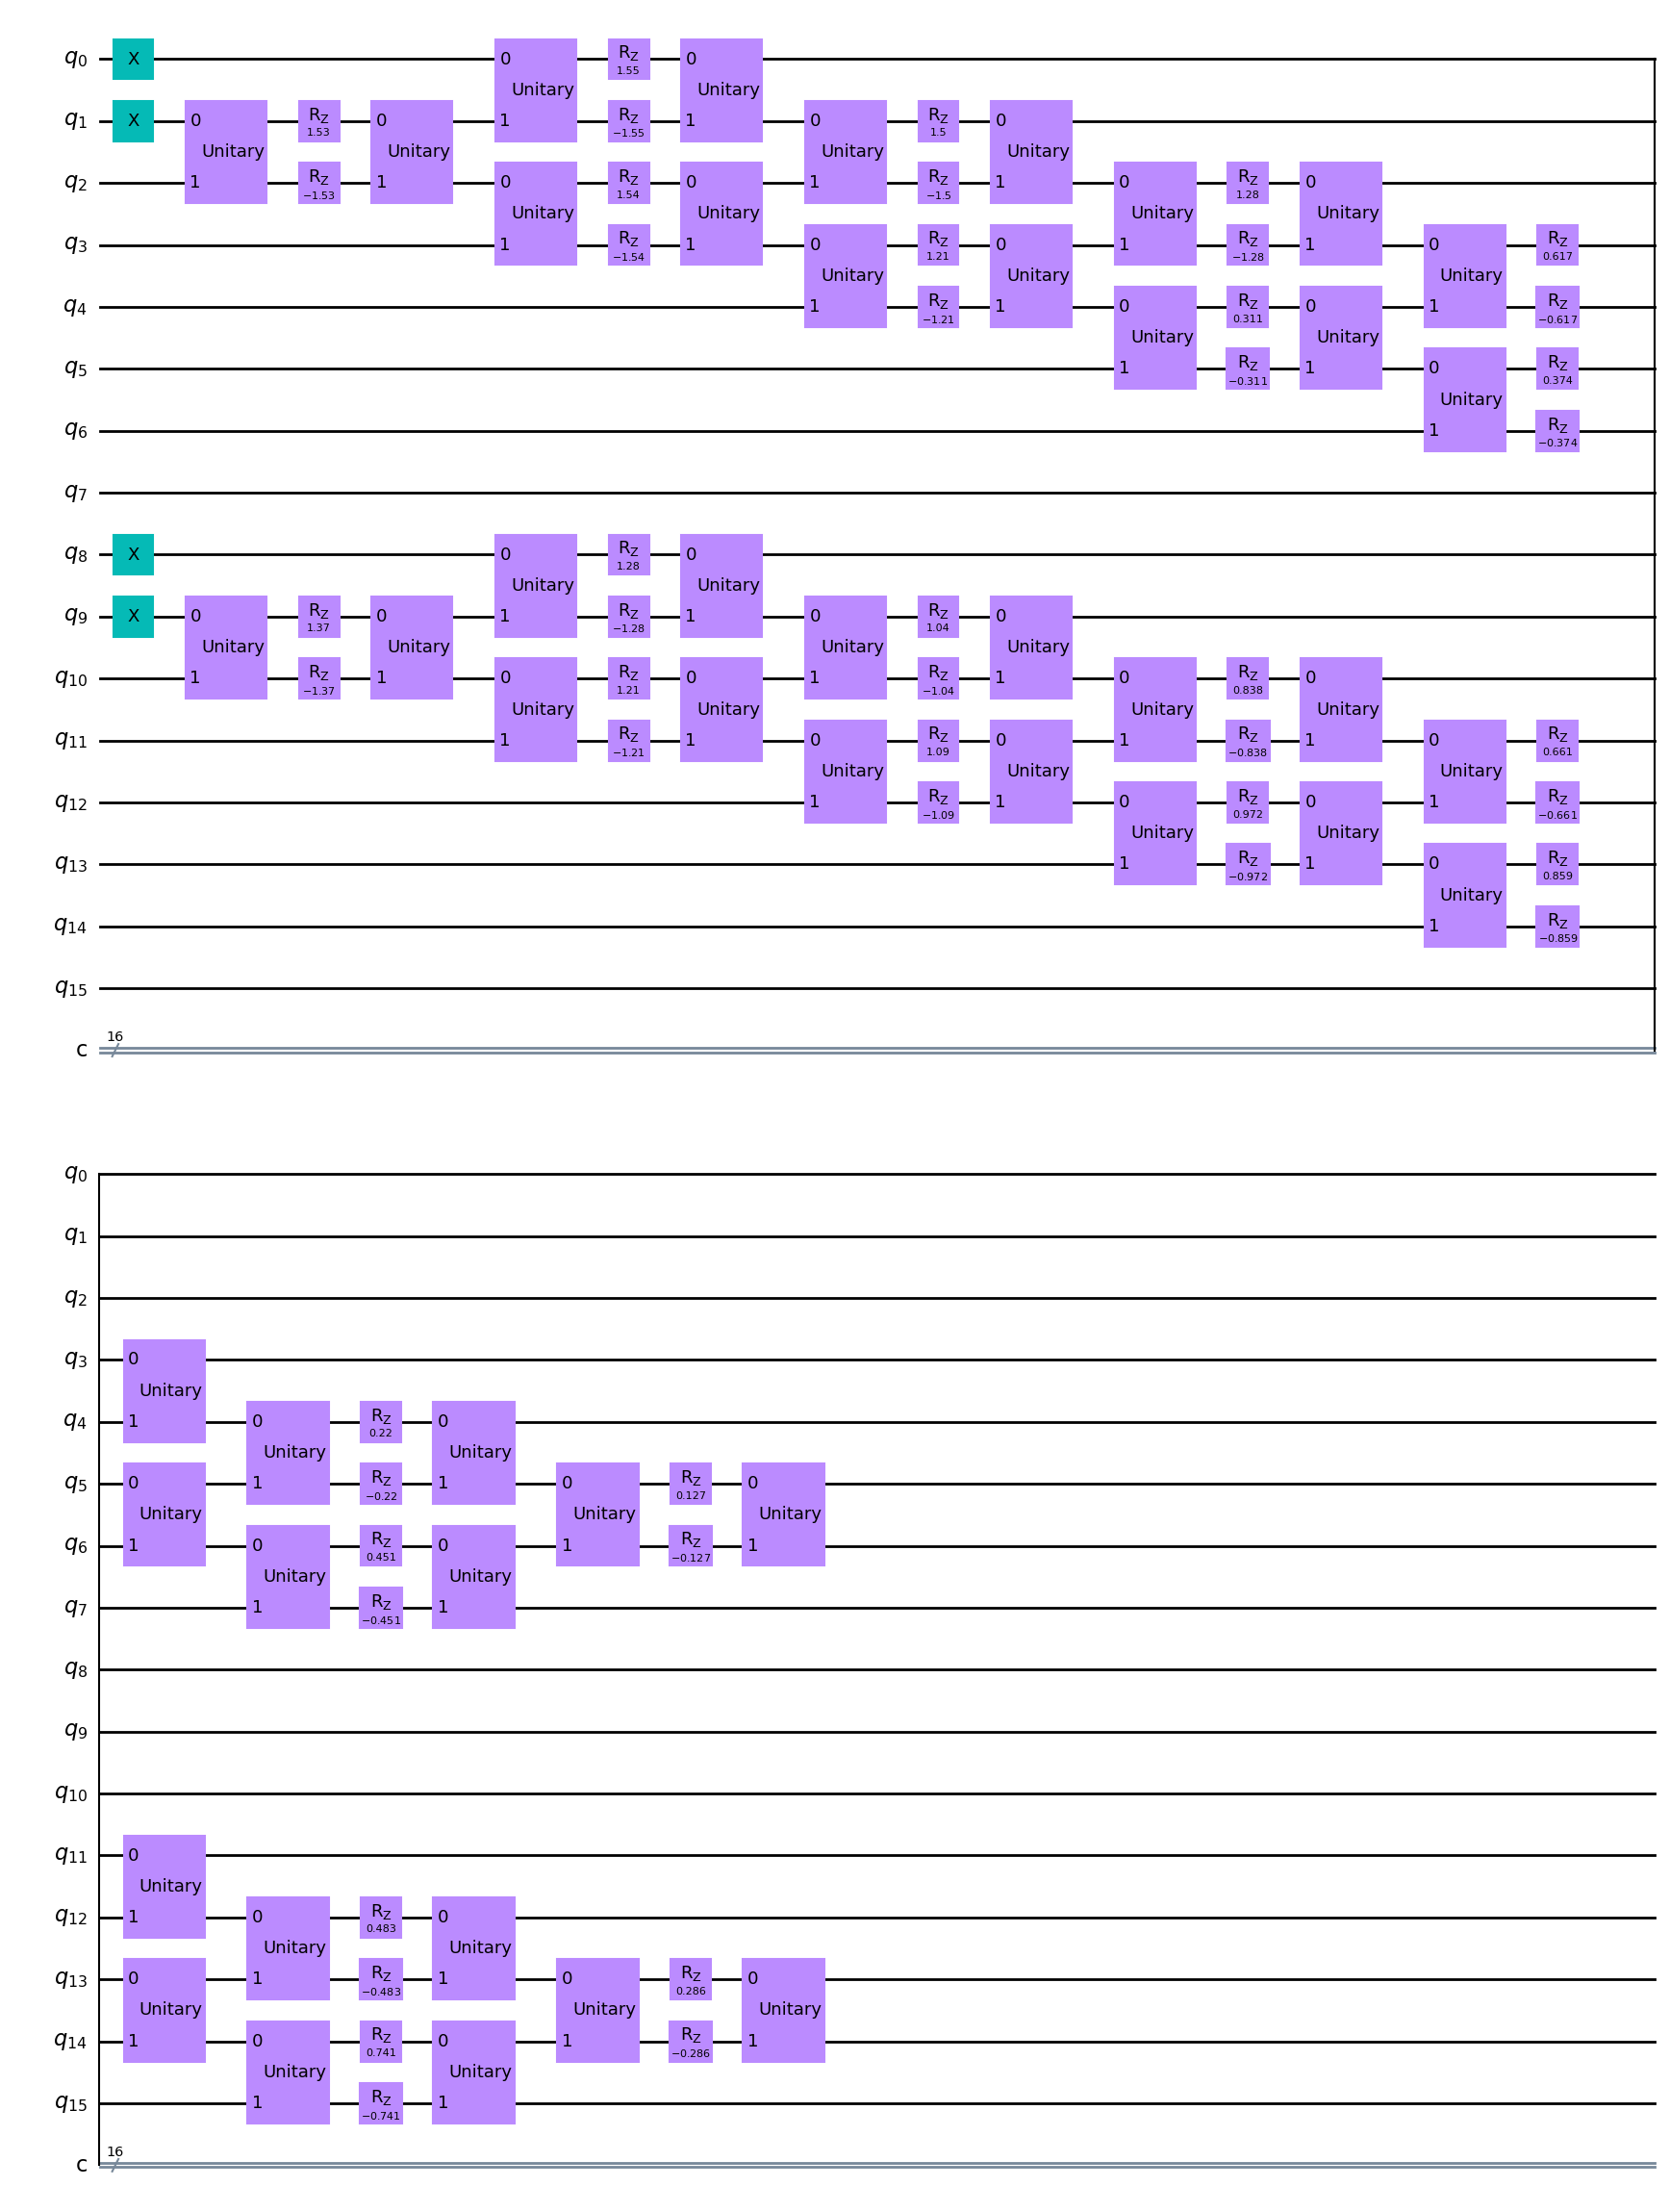

In [5]:
# Set-up SqrtISWAP gate
sqrt2 = np.sqrt(2)
SqrtISWAP = Operator( [
    [1, 0, 0, 0],
    [0, 1/sqrt2, 1j/sqrt2, 0],
    [0, 1j/sqrt2, 1/sqrt2, 0],
    [0, 0, 0, 1] ])

# Create a Quantum Circuit acting on the q register 
n = 16
circuit = QuantumCircuit(n,n)

g_angles_up = [-1.530, -1.552, -1.541, -1.497, -1.214, -1.285, -0.311, -0.6168, -0.3738, -0.2199, -0.4508, -0.1271]
g_angles_down = [-1.370, -1.282, -1.213, -1.040, -1.087, -0.8378, -0.9723, -0.6613, -0.8592, -0.4833, -0.7414, -0.2856]

# Define function to add Givens rotaion to circuit
def addGivens(a, b, theta):
    circuit.unitary(SqrtISWAP, [a,b])
    circuit.rz(-theta, a)
    circuit.rz(theta, b)
    circuit.unitary(SqrtISWAP.transpose().conjugate(), [a,b])
        
def initialise(n0,q):
    circuit.x(n0)
    circuit.x(n0+1)
    addGivens(n0 + 1, n0 + 2, -1.53)
    addGivens(n0, n0 +1, -1.552)
    addGivens(n0 + 2,n0+3,-1.541)
    addGivens(n0 + 1, n0 + 2, -1.497)
    addGivens(n0 + 3, n0 + 4, -1.214)
    addGivens(n0 + 2, n0 + 3, -1.285)
    addGivens(n0 + 4, n0 + 5, -0.311)
    addGivens(n0 + 3, n0 + 4, -0.6168)
    addGivens(n0 + 5, n0 + 6, -0.3738)
    addGivens(n0 + 4, n0 + 5, -0.2199)
    addGivens(n0 + 6, n0 + 7, -0.4508)
    addGivens(n0 + 5, n0 + 6, -0.1271)
    
def initialise1(n0,q):
    circuit.x(n0)
    circuit.x(n0+1)
    addGivens(n0 + 1, n0 + 2, -1.37)
    addGivens(n0, n0 +1, -1.282)
    addGivens(n0 + 2,n0+3,-1.213)
    addGivens(n0 + 1, n0 + 2, -1.040)
    addGivens(n0 + 3, n0 + 4, -1.087)
    addGivens(n0 + 2, n0 + 3, -0.8378)
    addGivens(n0 + 4, n0 + 5, -0.9723)
    addGivens(n0 + 3, n0 + 4, -0.6613)
    addGivens(n0 + 5, n0 + 6, -0.8592)
    addGivens(n0 + 4, n0 + 5, -0.4833)
    addGivens(n0 + 6, n0 + 7, -0.7414)
    addGivens(n0 + 5, n0 + 6, -0.2856)
    
    
    
def takeMeasure(nmax):
    arr = list(range(0, nmax))
    circuit.measure(arr, arr)

initialise(0, 8)
initialise1(8, 8)
#takeMeasure(n)

circuit.draw('mpl')

In [3]:
"""backend = provider.backend.ibmq_qasm_simulator
transpiled = transpile(circuit, backend=backend)
job = backend.run(transpiled)
retrieved_job = backend.retrieve_job(job.job_id())
plot_histogram(job.result().data().get('counts'))"""

"backend = provider.backend.ibmq_qasm_simulator\ntranspiled = transpile(circuit, backend=backend)\njob = backend.run(transpiled)\nretrieved_job = backend.retrieve_job(job.job_id())\nplot_histogram(job.result().data().get('counts'))"